# Another task that ViT (Vision Transformers) are capable of carrying out is Image Segmentation

We use some images from our file system and try to use segmentation to carry out object detection tasks by dividing the image into group of pixels.

In [1]:
from PIL import Image
from io import BytesIO
from transformers import DPTForSemanticSegmentation, DPTFeatureExtractor
import torch
import matplotlib.pylab as plt
import numpy as np

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
images_in_fs = [
    "../images/apple.jpg",
    "../images/sparrow.jpg",
    "../images/sunset.jpg",
    "../images/test_monkey.jpg"
]

In [3]:
model_used = "Intel/dpt-large-ade"
feature_extractor = DPTFeatureExtractor.from_pretrained(model_used)
model = DPTForSemanticSegmentation.from_pretrained(model_used)

/home/sajalpaudyal/Documents/Programming_Works/AI_agents_with_LLMs/lib64/python3.10/site-packages/transformers/models/dpt/feature_extraction_dpt.py:30: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(
Some weights of DPTForSemanticSegmentation were not initialized from the model checkpoint at Intel/dpt-large-ade and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.batch_norm1.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_mean', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.running_var', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm1.weight', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.bias', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2.num_batches_tracked', 'neck.fusion_stage.layers.0.residual_layer1.batch_norm2

In [5]:
images = []

for single_image in images_in_fs:
    image = Image.open(single_image).convert("RGB")
    images.append(image)
    

inputs=  feature_extractor(images=images, return_tensors="pt")

In [6]:
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    seg_maps = torch.argmax(logits, dim = 1).detach().cpu().numpy()
    

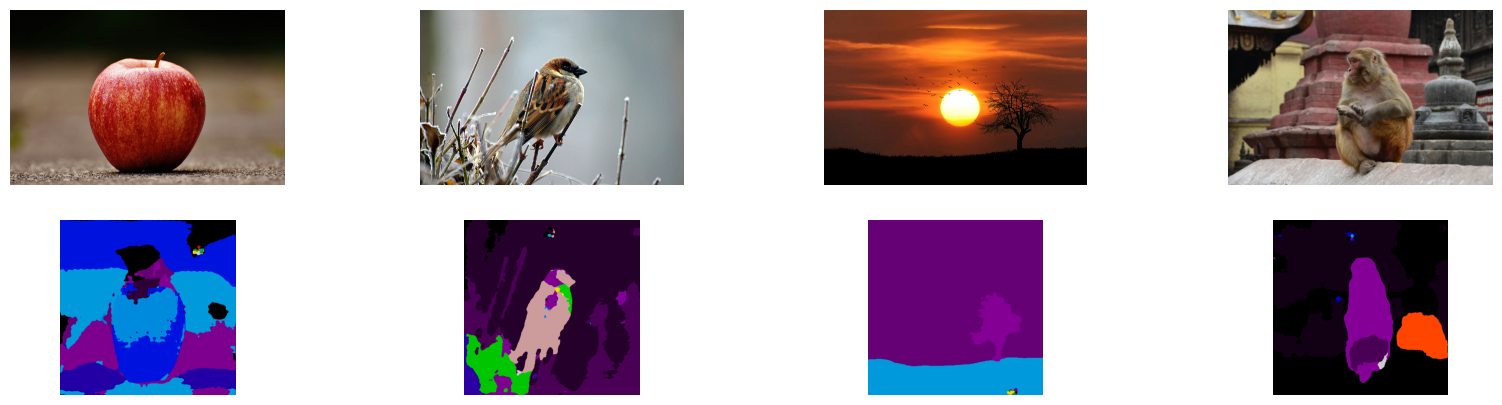

In [11]:
fig, axs = plt.subplots(2, len(images), figsize=(20,5))

for i, (image, seg_map)in enumerate(zip(images, seg_maps)):
    axs[0, i].imshow(image)
    axs[0,i].axis("off")
    
    axs[1, i].imshow(seg_map, cmap="nipy_spectral")
    axs[1, i].axis("off")
    
plt.show()